In [2]:
using Random
using PyPlot

スパイラルデータセットは渦巻状をしており，$k$番目$(k=0, \ldots, K-1)$のクラスに属するサンプルは次の式で表される:

$$
\begin{align}
&\phi_k = \theta+\delta\theta+\frac{2\pi k}{K}\quad (\theta=[0, \pi])\ \\
&\mathbf{x}_k=[r\cos(\phi_k),\ r\sin(\phi_k)]\in \mathbb{R}^2\quad (r=[0, 1])
\end{align}
$$
ただし，$\theta/r=\pi$であり，$\delta\theta \sim \mathcal{N}(0, \sigma^2=0.2^2)$である．

In [4]:
function generate_spiral_dataset(num_classes=4, num_samples_per_class=100, dims=2, σ_θ=0.2)
    rs = range(0, 1, length=num_samples_per_class)
    θs = rs .* pi
    rotθ = 2pi / num_classes
    
    x_ = zeros(num_samples_per_class, num_classes, dims);
    for i in 1:num_classes
        δθ = randn(num_samples_per_class) * σ_θ
        ϕ = θs + δθ .+ (i-1) * rotθ
        x_[:, i, :] = rs .* [cos.(ϕ) sin.(ϕ)]
    end
    x = reshape(x_, (:, dims));
    t = repeat(1:num_classes, inner=(num_samples_per_class, 1)); # class label
    return x, t
end

generate_spiral_dataset (generic function with 5 methods)

In [5]:
x, t = generate_spiral_dataset();

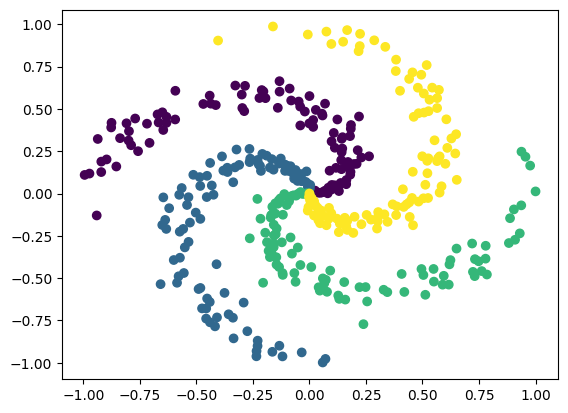

PyObject <matplotlib.collections.PathCollection object at 0x000001865C4301A0>

In [6]:
scatter(x[:, 1], x[:, 2], c=t)

In [ ]:
using MLDatasets

In [2]:
trainset = MNIST(:train)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [3]:
length(trainset)

60000

In [4]:
trainset[1]  # return first observation as a NamedTuple

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = 5)

In [5]:
X_train, y_train = trainset[:] # return all observations

(features = Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [6]:
summary(X_train)

"28×28×60000 Array{Float32, 3}"